{'whiskers': [<matplotlib.lines.Line2D at 0x155dc11c3c8>,
 'caps': [<matplotlib.lines.Line2D at 0x155dc12c508>,
 'boxes': [<matplotlib.lines.Line2D at 0x155dc124f48>,
 'medians': [<matplotlib.lines.Line2D at 0x155dc130908>,
 'fliers': [],
 'means': [<matplotlib.lines.Line2D at 0x155dc130f08>,
  <matplotlib.lines.Line2D at 0x155dc159e48>]}

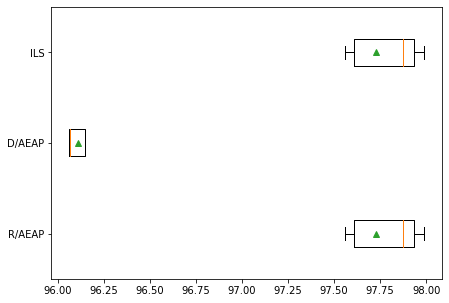

In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import csv

DIR_NAME = './solutions/'
FIG_SIZE = (7, 5)  # height * width

fontdict = {'family': 'Times New Roman', 'weight': 'normal', 'size':15}
colors = {
    'R/AEAP': 'blue', 'R/AEAP-BF': 'green', 'R/AEAP-WF': 'red',
    'D/AEAP': '#80aaff', 'd-aeapbf': 'green', 'd-aeapwf': 'red',
    'ILS': '#999999',
}

filenames_dict = {
    'R/AEAP': [],
    'D/AEAP': [],
    'ILS': []
}

labels = 'R/AEAP', 'D/AEAP', 'ILS'
data = []

for filename in os.listdir(DIR_NAME):
    if re.match(r'b.*backtracking.*aeap\.csv', filename):
        filenames_dict['R/AEAP'].append(filename)
    elif re.match(r'b.*dijkstra.*aeap\.csv', filename):
        filenames_dict['D/AEAP'].append(filename)
    elif re.match(r'o.*backtracking.*aeap\.csv', filename):  # only care about R/AEAP
        filenames_dict['ILS'].append(filename)

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.set_title('')

for alias, filenames in filenames_dict.items():  # take first file
    rels = []
    for filename in filenames:
        with open(os.path.join(DIR_NAME, filename), 'r') as file:
            reader = csv.reader(file)
            for line in reader:
                rels.append(float(line[0]) * 100)  # reliability
    data.append(rels)

# ax.set_ylim(ymin=98, ymax=100)
plt.boxplot(data, labels=labels, showmeans=True, showfliers=False, vert=False, whis=0.75)
# fig.savefig('./fig_boxplot.png')

